<a href="https://colab.research.google.com/github/emilliewbr-14/emilliewbr-14/blob/main/Pneus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cornering

In [ ]:
def f_curva(w, coef_at):
  """
  Força de curva máxima suportada pelo pneu [N]

  w = peso do carro [N]
  coef_at = coeficiente de atrito [adimensional]

  """
  f = w * coef_at
  return f

f_curva(7350, 1.5) #exemplo derek seward pág. 16 e 17

11025.0

In [ ]:
help(f_curva)

Help on function f_curva in module __main__:

f_curva(w, coef_at)
    Força de curva máxima suportada pelo pneu [N]
    
    w = peso do carro [N]
    coef_at = coeficiente de atrito [adimensional]



In [ ]:
def coef_at_max_curva(w, r, v):
  """
  Coeficiente de atrito do pneu necessário para fazer uma curva de raio 'r' na velocidade 'v' [adimensional]

  w = peso do carro [N]
  r = raio de curva [m]
  v = velocidade de curva [m/s]

  """
  m = w/9.81
  F = (m*v**2)/r
  return F/(w)

coef_at_max_curva(7350, 100, 138/3.6) #exemplo derek seward pág. 21

1.4979046324612075

In [ ]:
def vel_curva(w, r, coef_at):
  """
  Velocidade máxima de curva suportada pelo pneu de coeficiente de atrito 'coef_at' em uma curva de raio 'r' [m/s]

  w = peso do carro [N]
  r = raio de curva [m]
  coef_at = coeficiente de atrito [adimensional]

  OUTPUT

  v = velocidade máxima de curva [km/h]
  """
  m = w/9.81
  F = w*coef_at
  v2 = (F*r)/m
  v = (v2**0.5)*3.6
  return v

vel_curva(7350, 100, 1.5) #exemplo derek seward pág. 21

138.09648800747976

In [ ]:
def acel_lateral(w, F):
  """
  aceleração lateral [m/s^2]

  r = raio de curva [m]
  v = velocidade de curva [m/s]

  """
  g = 9.81
  m = w/g

  a = F/m/g
  return a

acel_lateral(7350,f_curva(7350, 1.5))

1.5

In [ ]:
def transf_lateral(F, hm, T):
  """
  Transferencia do peso em roll [N]

  F = força de curva máxima suportada pelo pneu [N]
  hm = altura do centro de massa [mm]
  T = bitola do carro (track) [mm]

  """
  return (F*hm)/T
transf_lateral(f_curva(7350, 1.5), 325, 1500) #exemplo derek seward pág. 21

2388.75

In [ ]:
def peso_rodas_lateral(w, F, hm, T, k=0.5, lado='r'):
  """
  Distribuição de peso nas rodas em curva (roll)

  w = peso do carro [N]
  k = porcentagem de peso no lado direito do carro /100 [adimensional]
  F = força de curva máxima suportada pelo pneu [N]
  hm = altura do centro de massa [mm]
  T = bitola do carro (track) [mm]

  OUTPUT
    Wrr = peso na roda traseira direita [N]
    Wrl = peso na roda traseira esquerda [N]
    Wfr = peso na roda dianteira direita [N]
    Wfl = peso na roda dianteira esquerda [N]
  """

  def transf_lateral(F, hm, T):
    """
    Transferencia do peso em roll

    F = força de curva máxima suportada pelo pneu [N]
    hm = altura do centro de massa [mm]
    T = bitola do carro (track) [mm]

    """
    return (F*hm)/T

  Wr = w * k
  Wl = w * 1-k

  if lado == 'r':
    dW = - transf_lateral(F, hm, T)
  elif lado == 'l':
    dW = transf_lateral(F, hm, T)


  Wrr = (Wr - dW)/2
  Wrl = (Wr + dW)/2
  Wfr = Wrr
  Wfl = Wrl

  return Wrr, Wrl, Wfr, Wfl

F = f_curva(7350, 1.5)
peso_rodas_lateral(7350, F, 325, 1500) #exemplo derek seward pág. 21

(3031.875, 643.125, 3031.875, 643.125)

# Accel

In [ ]:
def f_tracao(w, k, coef_at, hm, L):
  """
  Força de tração máxima suportada pelo pneu [N]

  w = peso do carro [N]
  k = porcentagem de peso na traseira /100 [adimensional]
  coef_at = coeficiente de atrito do pneu [adimensional]
  hm = altura do centro de massa [mm]
  L = entre eixos [mm]

  """

  Wr = w * k #estático
  Wf = w * 1-k #estático
  F = (Wr * coef_at)/ (1 - (hm*coef_at)/L)

  return F

f_tracao(7350, 1950/3215, 1.5, 325, 3215) #exemplo derek seward pág. 13

7882.2181484876255

In [ ]:
F = f_tracao(315*9.8,0.641,1.5,215,1600)

3717.448767123288

In [ ]:
def peso_rodas_longitudinal(w, k, F, hm, L, brake_ou_accel="accel"):
  """
  Distribuição de peso nas rodas em accel(squat) ou frenagem(dive)

  w = peso do carro [N]
  k = porcentagem de peso na traseira /100 [adimensional]
  F = força de tração ou frenagem máxima suportada pelo pneu [N]
  hm = altura do centro de massa [mm]
  L = entre eixos [mm]

  OUTPUT
    Wrr = peso na roda traseira direita
    Wrl = peso na roda traseira esquerda
    Wfr = peso na roda dianteira direita
    Wfl = peso na roda dianteira esquerda
  """

  def transf_longitudinal(F, hm, L):
    """
    Transferencia do peso em squat ou dive

    F = força de tração ou frenagem máxima suportada pelo pneu [N]
    hm = altura do centro de massa [mm]
    T = bitola do carro (track) [mm]
    """
    return (F*hm)/L

  Wr = w * k #estático
  Wf = w * (1-k) #estático
  if brake_ou_accel == 'brake':
    dW = - transf_longitudinal(F, hm, L) # transferencia do peso em squat
  elif brake_ou_accel == 'accel':
    dW = transf_longitudinal(F, hm, L)


  Wrr = (Wr + dW)/2
  Wrl = Wrr
  Wfr = (Wf - dW)/2
  Wfl = Wfr

  return Wrr, Wrl, Wfr, Wfl

F = f_tracao(7350, 1950/3215, 1.5, 325, 3215)
peso_rodas_longitudinal(7350, 1950/3215, F, 325, 3215, 'accel') #exemplo derek seward pág. 13

(2627.4060494958753, 2627.4060494958753, 1047.593950504125, 1047.593950504125)

In [ ]:
def torque(Wrr, Wrl, Rr, coef_at):
  """
  Torque máximo suportado pelo pneu [N*m]

  Wrr = peso na roda traseira direita [N]
  Wrl = peso na roda traseira esquerda [N]
  Raio de rolagem = distanância entre raio do pneu deformado e raio do pneu não deformado [mm]
  coef_at = coeficiente de atrito do pneu [adimensional]

  """
  t = (Wrr + Wrl) * Rr * coef_at

  return t/1000

Wr = peso_rodas_longitudinal(7350, 1950/3215, F, 325, 3215)
torque(Wr[0], Wr[1], 275, 1.5) #exemplo derek seward pág. 13

2167.6099908340975

In [ ]:
def acel_max(w, F):
  """
  Aceleração ou desaceleração de reta máxima suportada pelo pneu [g]

  F = força de tração máxima suportada pelo pneu [N]
  w = peso do carro [N]

  """
  g = 9.81 #[m/s^2]
  m = w/g
  return F/m/g

F = f_tracao(7350, 1950/3215, 1.5, 325, 3215)

acel_max(7350, F) #exemplo derek seward pág. 13

1.072410632447296

#Brake

In [ ]:
# Brake energy
g = 9.81 # aceleração gravitacional
m = 2800 # massa [N]
V = 34 # velocidade máxima [m/s] -> 120 km/h = 34m/s
K = 1.0 # fator de correção aproximado para massas rotacionais (de acordo com Rudolf Limpert - Brake Desing and Safety p.66)
Eb = (K*m*(V**2))/(2*g) # Energia de frenagem [Nm]
print("Energia de frenagem: {:.2f} J".format(Eb))

# BRAKE POWER
a = 15 # (des)aceleração [m/s²]
Pbm = ((K * m * a * V) / (2 * g)) # Potência média de frenagem [W]
print("Potência média de frenagem: {:.2f} W".format(Pbm))

# Cálculo de massa dos discos:

#a = float(input("Área do disco [mm²]: ")) # área [mm²]
#e = float(input("Espessura do disco [mm]: ")) # espessura [mm]
#d = 8000  #densidade do material #aço 1045: 7870 kg/m³ / aço inox 304: 8000 kg/m³
#Md = ((a*e)*10e-9)*d
#Mdt = md*4

Md =  0.241 # massa [kg], usar apenas a massa da pista do disco de freio (fornecida no inventor)
Mtd = Md * 4

print("Massa de cada disco [Kg]: {:.3f}".format(Md))
print("Massa de todos os discos[Kg]: {:.3f}".format(Mtd))

# Temperatura que os discos chegariam:
#Mt = float(input('Massa dos discos [Kg]: '))
c = 477 # Calor específico do material escolhido [J/Kg.K] # calor específico do aço 1045: 502J/Kg.K
Ti = 303 # Temperatura inicial da peça [K]
Tm = 400 #int(input('Temperatura de fusão do material [°C]: ')) #temperatura de fusão do aço 1045: 1400°C
Tf = (((Eb)/(Mtd*c))+Ti)

print('temperatura final [°C]: {:.2f}'.format(Tf-273.15))

if (Tf-273.5)>Tm:
  print('O sistema não suportará a frenagem!')
else:
  print('O sistema suportará!')

Energia de frenagem: 164974.52 J
Potência média de frenagem: 72782.87 W
Massa de cada disco [Kg]: 0.241
Massa de todos os discos[Kg]: 0.964
temperatura final [°C]: 388.62
O sistema suportará!


In [ ]:
Mt = 2800 # Massa total = 2800 N
EE = 1600 # Entre eixos = 1560 mm
Cm_Ed = 1000 # Centro de massa até eixo dianteiro = 1000 mm
ACm = 215 # Altura centro de massa = 215 mm
Dm = 15 # Desaceleração máxima pretendida = 15 m/s²

# Massa dinâmica
Wr = (Mt * Cm_Ed)/EE # Weight rear = (Mass * Distance from front wheel to center of mass) / wheel base
Wf = Mt - Wr
print("Massa estática dianteira [N]: {:.2f}".format(Wf), "=> {:.2f} %".format(Wf/28))
print("Massa estática traseira [N]: {:.2f}".format(Wr), "=> {:.2f} %".format(Wr/28))

#Força de Frenagem
Fb = Mt * (Dm/10)

#Transferência longitudinal de massa
Tlm = (Fb * ACm)/EE
print("Balanço dinâmico [N]: ± {:.2f}". format(Tlm))

#Balanço dinâmico por eixo
Bdf = (Wf + Tlm)/2
Bdr = (Wr - Tlm)/2
print("Massa dinâmica por roda na dianteira [N]: {:.2f}".format(Bdf), "=> {:.2f} %".format(Bdf/14))
print("Massa dinâmica por roda na traseira [N]: {:.2f}".format(Bdr), "=> {:.2f} %".format(Bdr/14))

#Força de frenagem
Ffd = Bdf * Dm/10
Fft = Bdr * Dm/10
#print(Ffd)
#Torque de frenagem
Tfd = (Ffd * ((19.2*25.4)/2)) # diâmetro externo de um pneu aro 10" da hoosier é 16" e da AG pneus é 19.2"
Tft = (Fft * ((19.2*25.4)/2))
print("Torque de frenagem a ser alcançado [Nmm]: {:.2f}".format(Tfd))
print("Torque de frenagem a ser alcançado [Nmm]: {:.2f}".format(Tft))

# Razão de forças do pedal
D1 = 200 #float(input('D1 [mm]: ')) #medida do ponto de aplicação da força do piloto até o eixo de rotação do pedal
D2 = 40 #float(input('D2 [mm]: ')) # medida do ponto de fixação do cilindro mestre até o ponto de rotação do pedal
R = D1/D2
print("A razão do pedal é:",R)

# Força necessária exercida no pedal
import math
Ps = 7 # Pressão do sistema não pode passar de 7 N/mm² (70 bar)
dmc = 14 # diâmetro do embolo dos cilindros mestre
MCa = math.pi*((dmc/2)**2) #[mm²]
Fmc = Ps * MCa #[N/mm²]
Fp = Fmc/R # Força do piloto (não deve passar de 500N) [N] # R é a razão de forças do pedal
print("Força mínima no pedal [N]: {:.2f}".format(Fp))

# Força de "mordida" da pinça
import math
dp = 31.5 # diametro do embolo da pinça [mm]
Ap = math.pi*((dp/2)**2) # area do embolo da pinça [mm²]
Fmp = Ps * Ap # força de mordida [N]
print('Força de mordida da pinça [N]: {:.2f}'.format(Fmp))

# Raio efetivo do disco
μp = 0.4 #coeficiente de atrito da pastilha [admensional]
Red = Tfd/(2*Fmp*μp)
Ret = Tft/(2*Fmp*μp)
print("Raio efetivo do disco dianteiro [mm]: {:.2f}".format(Red))
print("Raio efetivo do disco traseiro [mm]: {:.2f}".format(Ret))

# Volume deslocado de fluido
de = 2
dp = 15
Vmc = MCa * dp
Vp = Ap * de
if Vmc>Vp:
  print('Desloca fluido suficiente!')
else:
  print('Quantidade de fluido não suficiente!')
print('Volume do cilindro mestre [mm³]: {:.2f}'.format(Vmc))
print('Volume da pinça [mm³]: {:.2f}'.format(Vp))
print(MCa)
print(Ap)
print(Ap/MCa)

Massa estática dianteira [N]: 1050.00 => 37.50 %
Massa estática traseira [N]: 1750.00 => 62.50 %
Balanço dinâmico [N]: ± 564.38
Massa dinâmica por roda na dianteira [N]: 807.19 => 57.66 %
Massa dinâmica por roda na traseira [N]: 592.81 => 42.34 %
Torque de frenagem a ser alcançado [Nmm]: 295236.90
Torque de frenagem a ser alcançado [Nmm]: 216827.10
A razão do pedal é: 5.0
Força mínima no pedal [N]: 215.51
Força de mordida da pinça [N]: 5455.18
Raio efetivo do disco dianteiro [mm]: 67.65
Raio efetivo do disco traseiro [mm]: 49.68
Desloca fluido suficiente!
Volume do cilindro mestre [mm³]: 2309.07
Volume da pinça [mm³]: 1558.62
153.93804002589985
779.311327631118
5.0625


In [ ]:
#Estudo analítico termodinâmico dos discos de freio: G. Cunha
import math

# Potência de frenagem: pág.27
μp #coeficiente de atrito da pastilha
lp = 0.040 # Largura da pastilha [mm]
B = 1 # relação de distribuição entre os CM
R # relação de multiplicação do pedal
Fp # Força de acionamento do pedal
Ap # área do pistão da pinça de freio
MCa # área do pistão do CM
Rd = 0.060 # raio efetivo do disco dianteiro [m]
ω = V/Rd # velociade angular do disco
PotFr = (2*μp*B*R*Fp)*(Ap/MCa)*(Rd - (lp/2))*ω
print("Potência de frenagem [W]: {:.2f}".format(PotFr))

###########################################################

# Número de Reynolds: pg.39
Rd = 0.060 # Raio efetivo do disco de freio [m]
υ = 1.562 * (10**-5) # viscosidade cinemática do ar à 25°C e 1.0 atm [m²/s]
Re = (ω*(Rd**2))/υ
print("Número de Reynolds [adimensional]: {:.2f}".format(Re))

###########################################################

# Dimensão característica de Nusselt: pg.40
#Nu = (0.0149*(Re**0.8))
Pr = 2.5548 # informação tirada da tabela da usp (https://sistemas.eel.usp.br/docentes/arquivos/5817712/TDQ%20I/termo%2018a.pdf)
Nu = (0.0308)*(Re**0.8)*(Pr**(1/3))
print("Valor de Nusselt [adimensional]: {:.2f}".format(Nu))

###########################################################

# Coeficiente de transferência de calor médio: pg.40
k_ar = 0.026 # condutividade térmica do ar [W/m*K] à 25°C e 1.0 atm
h = ((k_ar/Rd)*0.0149)*(((ω*(Rd**2))/υ)**0.8)
print("Coeficiente de transferência de calor médio [W/m².K]: {:.2f}".format(h))

###########################################################

# Volume do volume de controle: pg. 36
δ = 0.004 # espessura do disco de freio [m]
Δθ = 36 # variação angular do controle [°] (360°/10)
ΔRd = 0.030 # variação do raio no controle [m]
Vvc = Rd * ΔRd * Δθ * δ
print("Volume do volume de controle [m³]: {:.7f}".format(Vvc))

###########################################################

# Área do volume de controle: pg. 36
Δθ # variação angular do controle [°] (360°/10)
ΔRd # variação do raio no controle [m]
Avc = Rd * ΔRd * Δθ
print("Área do volume de controle [m²]: {:.2f}".format(Avc))

###########################################################

# Número de Biot: pg.35
h # coeficiente de transferência de calor médio
Vvc # volume do volume de controle
Avc # área do volume de controle
k = 17 # condutividade térmica do material do disco [W/m.K]
Bi = (h*(Vvc/Avc))/k # o valor deve ser menor que 0.1 para que possamos desconsiderar a alteração irregular de temperatura no interiror do disco
print("Número de Biot [adimensional]: {:.3f}".format(Bi))

############################################################

# Distância de frenagem: pág.41
μps = 1.5 #coeficiente de atrito do pneu com o solo
ΔS = (V**2)/(2*g*μps)
print("Distância de frenagem [m]: {:.2f}".format(ΔS))

############################################################

# Distância percorrida por rotação do disco: pág. 42
D = 487.68 #Diâmetro do pneu da AG em mm (em polegadas da 19.2)
l = math.pi*(D/1000) #eq. 45
print("Distância percorrida por rotação do disco [m]: {:.2f}".format(l))

#############################################################

# Número de rotações no período da frenagem: pág. 42 eq. 46
N = ΔS/l
print("Número de rotações no período da frenagem: {:.2f}".format(N))

##############################################################

# Tempo de frenagem: pág. 43 eq. 47
Tfr = (V)/(g*μps)
print("Tempo de frenagem [s]: {:.2f}".format(Tfr))

###############################################################

# Tempo de uma rotação do disco: pág. 43 eq.48
Trot = Tfr/N
print("Tempo de uma rotação do disco [s]: {:.4f}".format(Trot))

###############################################################

# Temperatura do disco:
# MATERIAL DO DISCO DE FREIO: aço inox 410
Cp = 477 # calor específico do disco de freio [J/kg.K]
β = 1 # constante para troca térmica [adimensional]  ------------------ pode ser 0 ou 1 (qunado é 0 não tem atrito, quando é 1 tem)
ρ = 7870 # densidade do material do disco [kg/m³]
δ # espessura do disco de freio [m]
ε = 0.07 # emissividade térmica do aço polido à 100°C [adimensional]
h # coeficiente de transferência de calor médio [W/m*K]
Tamb = 300 # Temperatura ambiente [K]
Fi_ii = 0.5 # Fator de forma [adimensional]
σ = 5.67*(10**-8) # Constante de Stefan-Boltzman [W/m².K⁴]


Avc1 = Rd * Δθ * δ # Área do volume de controle 1
Avc2 = ΔRd * δ # Área do volume de controle 2
Avc3 = Rd * ΔRd * Δθ # Área do volume de controle 3
Vvc = Rd * ΔRd * Δθ * δ # Volume do volume de controle


# Temperatura da faixa interna (raio menor)

a1 = ((-(2*k*Avc2)/Rd*Δθ)-((k*Avc1)/ΔRd)-(h*Avc3)+((Vvc*ρ*Cp)/ Trot)) / ((Vvc*ρ*Cp)/ Trot)
b1 = (((k*Avc2)/(Rd*Δθ)) / ((Vvc*ρ*Cp) / Trot))
c1 = ((k*Avc1)/ΔRd)/((Vvc*ρ*Cp)/(Trot))
d1 = (-(Fi_ii * ε * σ * Avc3) / ((Vvc * ρ * Cp) / Trot))
e1 = ((h*Avc3*Tamb)+(Fi_ii*ε*σ*Avc3*(Tamb**4))) / ((Vvc*ρ*Cp)/Trot)

T1_j_m = 303
T1_j0_m = 303
T1_j1_m = 303
T2_j_m = 303
cont1 = 0
while cont1 < N:

  T1_j_m1 = (a1*T1_j_m) + (b1*(T1_j0_m + T1_j1_m)) + (c1 * T2_j_m) + (d1*(T1_j_m)**4) + e1

  T2jm = T1_j_m1
  T2j0m = T1_j_m1
  T2j1m = T1_j_m1
  T1jm = T1_j_m1
  T2jm = T1_j_m1

  cont1 += 1
  #print(T1_j_m1-273.15)
print("Temperatura da faixa interna (raio menor) [°C] = {:.2f}".format(T1_j_m1 - 273.15))


# Temperatura faixa externa (raio maior)

a2 = ((-(2*k*Avc2)/ (Rd*Δθ)) - ((k*Avc1) / ΔRd) - (h*Avc3*(1-β)) + ((Vvc*ρ*Cp)/ Trot))/ ((Vvc*ρ*Cp)/ Trot)
b2 = ((k*Avc2)/(Rd*Δθ))/ ((Vvc*ρ*Cp / Trot))
c2 = (((k*Avc1)/ ΔRd))/ ((Vvc*ρ*Cp)/ (Trot))
d2 = (-(Fi_ii * ε * δ * Avc3) * (Trot * (1-β))) / (Vvc * ρ * Cp)
e2 = ((h * Avc3 * Tamb) + (Fi_ii * ε * Vvc * (Tamb)**4) * (1-β) + PotFr*β) / ((Vvc * ρ * Cp) / Trot)

# Fórmula temperatura para a faixa externa (Tfe = T2jm+1)

T2jm = 303
T2j0m = 303
T2j1m = 303
T1jm = 303
T2jm = 303
cont2 = 0
while cont2 < N:

  Tfe = (a2 * T2jm) + (b2 * (T2j0m + T2j1m)) + (c1 * T1jm) + (d2 * T2jm)**4 + e2

  T2jm = Tfe
  T2j0m = Tfe
  T2j1m = Tfe
  T1jm = Tfe
  T2jm = Tfe

  cont2 += 1
  #print("Rotação",cont2,"→","{:.2f}°C".format(Tfe - 273.15))
  #print(Tfe)
print('Temperatura da faixa externa (raio maior) [°C] = {:.2f}'.format(Tfe - 273.15))

# Fluxo máximo permitido e real: pág. 28 eq. 7

qmax_ = (0.0288*(439 - (0.46 * 310)))/ δ
print('Fluxo de calor permitido [W/m²] = {:.2f}'.format(qmax_))

qreal_ = (0.0288*(439 - (0.46 * (Tfe-273.15))))/ δ # ta errado aidna (precisa reduzir a area varrida para 65% do total)
#print('Fluxo de calor real [W/m²] = {:.2f}'.format(qreal_))

Potência de frenagem [W]: 98920.58
Número de Reynolds [adimensional]: 130601.79
Valor de Nusselt [adimensional]: 521.31
Coeficiente de transferência de calor médio [W/m².K]: 79.94
Volume do volume de controle [m³]: 0.0002592
Área do volume de controle [m²]: 0.06
Número de Biot [adimensional]: 0.019
Distância de frenagem [m]: 39.28
Distância percorrida por rotação do disco [m]: 1.53
Número de rotações no período da frenagem: 25.64
Tempo de frenagem [s]: 2.31
Tempo de uma rotação do disco [s]: 0.0901
Temperatura da faixa interna (raio menor) [°C] = 29.78
Temperatura da faixa externa (raio maior) [°C] = 271.81
Fluxo de calor permitido [W/m²] = 2134.08


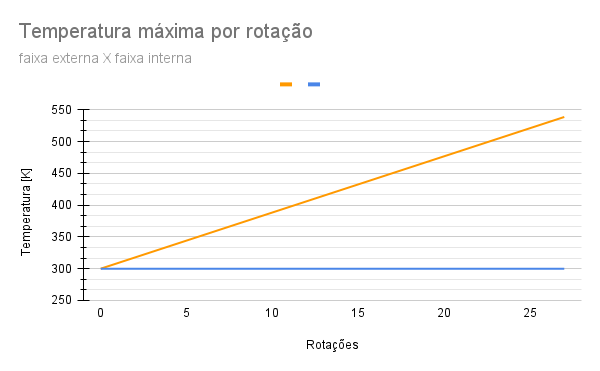

In [ ]:
# Potência de Frenagem por velocidade
import math

# Potência de frenagem: pág.27
μp #coeficiente de atrito da pastilha
lp = 0.040 # Largura da pastilha [mm]
B = 1 # relação de distribuição entre os CM
R # relação de multiplicação do pedal
Fp # Força de acionamento do pedal
Ap # área do pistão da pinça de freio
MCa # área do pistão do CM
Rd = 0.060 # raio efetivo do disco dianteiro [m]
a = 15
V0 = 34
ω = V0/Rd
PotFr = (2*μp*B*R*Fp)*(Ap/MCa)*(Rd - (lp/2))*ω
print(PotFr*0.35)
cont = 0
while V0 > 0:
  V0 -= 1.26
  cont += 1
  #print (V0)
  ω = V0/Rd # velociade angular do disco
  PotFr = (2*μp*B*R*Fp)*(Ap/MCa)*(Rd - (lp/2))*ω
  print(PotFr*0.35)
print(cont)

34622.204582225124
33339.146412413254
32056.08824260138
30773.030072789512
29489.97190297763
28206.913733165762
26923.855563353885
25640.797393542012
24357.73922373014
23074.681053918266
21791.62288410639
20508.564714294516
19225.50654448264
17942.448374670766
16659.390204858893
15376.332035047022
14093.27386523515
12810.215695423278
11527.157525611407
10244.099355799533
8961.041185987662
7677.983016175789
6394.924846363917
5111.866676552046
3828.808506740174
2545.7503369283017
1262.6921671164296
-20.36600269544284
27


In [ ]:
# Pressão do sistema [N/mm²] durante o teste dos 2000N
import math
# Razão de forças do pedal
D1 = 200 #float(input('D1 [mm]: ')) #medida do ponto de aplicação da força do piloto até o eixo de rotação do pedal
D2 = 40 #float(input('D2 [mm]: ')) # medida do ponto de fixação do cilindro mestre até o ponto de rotação do pedal
R = D1/D2

Ft = 2000 # Força de teste [N]
Fmc = Ft * R # R é a razão de forças do pedal
#print('{:.2f}'.format(Fmc))

dmc = 14 #float(input("d [mm]: ")) # diâmetro do embolo dos cilindros mestre
MCa = math.pi*((dmc/2)**2) #[mm²]
#print('{:.2f}'.format(MCa))

#calculo da pressão no sistema
Ps = Fmc/MCa #[N/mm²]
print('Pressão no teste dos 2000N [bar]: {:.2f} '.format(Ps*10))

# Pressão do sistema durante aplicação de força suficiente para o travamento das rodas do véiculo
Fmc = Fp * R
Psu = Fmc/MCa

print('Pressão de utilização [bar]: {:.2f} '.format(Psu*10))

Pressão no teste dos 2000N [bar]: 649.61 
Pressão de utilização [bar]: 70.00 


In [ ]:
# Torque inercial pelo limpert

M = 280 #float(input("Massa do veículo [kg]: ")) # 320kg
g = 10
Dp = 0.5657 #percentual de tranferencia de peso dianteira
μPA = 1.5 #float(input("Coeficiente de Atrito do pneu com asfalto: ")) #1.5
Aro = 19.2 #float(input("Aro externo do pneu [in]: ")) # 16" para uma roda 10"

Ti = (((M*g)*Dp)/2)*(((Aro*25.4)/2)/1000)*(μPA)
print("Torque Inercial por roda dianteira [Nm]: {:.2f}".format(Ti))

Torque Inercial por roda dianteira [Nm]: 289.67


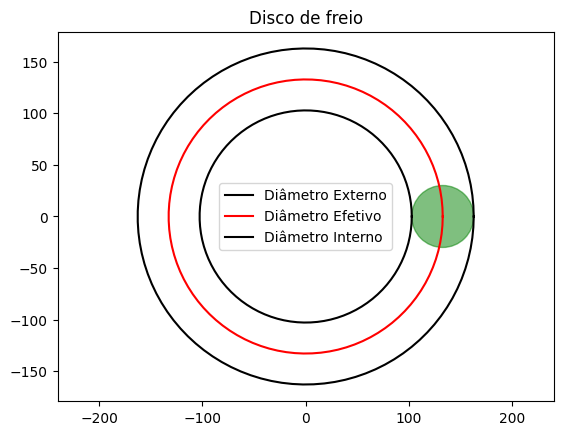

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_circle(center, radius, color='b', alpha=0.5):
    circle = plt.Circle(center, radius, color=color, alpha=alpha)
    plt.gca().add_patch(circle)

# Defina os parâmetros dos círculos
def plot_circles():
   center1 = ( 2*66.38, 0) # embolo da pinça
   radius1 = 2*dp

   plot_circle(center1, radius1, color='green')

# Chame a função para plotar os círculos
plot_circles()

# Círculo externo
theta = np.linspace(0, 2*np.pi, 100)
outer_radius = 2*Red + 30
x_outer = outer_radius * np.cos(theta)
y_outer = outer_radius * np.sin(theta)

# Circulo médio
middle_radius = 2*Red
x_middle = middle_radius * np.cos(theta)
y_middle = middle_radius * np.sin(theta)

# Círculo interno
inner_radius = 2*Red - 30
x_inner = inner_radius * np.cos(theta)
y_inner = inner_radius * np.sin(theta)

# Plotar os círculos
plt.plot(x_outer, y_outer, label='Diâmetro Externo', color='black')
plt.plot(x_middle, y_middle, label='Diâmetro Efetivo', color='red')
plt.plot(x_inner, y_inner, label='Diâmetro Interno', color='black')

# Configurações adicionais
plt.axis('equal')  # Manter a proporção dos eixos igual
plt.title('Disco de freio')
plt.legend()  # Adicionar legenda

# Mostrar o gráfico
plt.show()


In [ ]:
# Pistão ficticio para base de calcúlos quando há 2 pistões paralelos p.56 - rudolf limpert 'brake desing and safety'
d1 = float(input("d1: "))
d2 = float(input("d2: "))
d3 = ((d1**2) + (d2**2))**(1/2)

print(d3)

In [ ]:
# BRAKE FACTOR para freios a disco (BF) [adimensional] - rudolf limpert 'brake design and safety'

μp = float(input('μp: ')) #coeficiente de atrito da pastilha [admensional]
#Fd = (μp*Fa)/Fa # força de arrasto do disco [N]
BF = (2*μp*Fmp)/Fmp

print(BF)

μp: 0.45
0.9


In [ ]:
# Força máxima aplicável à uma pastlha do tipo 'hammerhead' sem distorção da pressão sobre o disco, [N] - rudolf limpert 'brake design and safety'
Fa = float(input()) #força aplicada contra a pastilha, [N]
Lp = float(input()) #Altura da pastilha, [mm]
Ep = float(input()) #Espessura da pastillha, [mm]
b = float(input()) # medida do centro até a extremidade superior da base da pastilha, [mm]
Fmax = Fa*(1+((6/Lp)*((μp*Ep)-(μp*b))))

print(Fmax)